In [54]:
from grokking import utils

In [55]:
#log_filepath = r"D:\Dropbox\out_dir\grokking\seed_search.txt"
#log_filepath = r"D:\Dropbox\out_dir\grokking\magic8_seed_search.txt"
log_filepath = r"D:\Dropbox\out_dir\grokking\seed_search_wd0_magic8.txt"




In [56]:
with open(log_filepath, 'r') as f:
    lines = f.readlines()

logs = []
for line in lines:
    if 'seed=' not in line:
        continue
    columns = line.split('[INFO] ')[1].split(',')
    log = {}
    for column in columns:
        if '=' in column:
            key, val = tuple(column.split('='))
            val = val.strip()
            if val.isnumeric():
                val = int(val)
            else:
                try:
                    val = float(val)
                except ValueError:
                    pass
            log[key.strip()] = val
    logs.append(log)
    
print('Number of logs: {}'.format(len(logs)))
print('Example log: {}'.format(logs[0]))

Number of logs: 1539
Example log: {'seed': 0, 'data_loader_seed': 8, 'train/step': 2999, 'val/acc': 0.007353, 'val/loss': 16.32, 'train/acc': 0.957, 'train/loss': 0.1541, 'w_norm': 73.16, 'lr': 0.001}


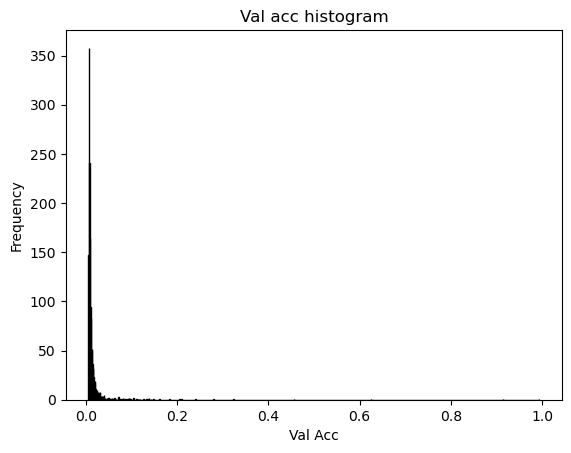

In [57]:
utils.draw_histogram([log['val/acc'] for log in logs if log['val/acc'] > 0], 'Val Acc', 'Frequency', 'Val acc histogram')

In [58]:
good_seeds = [log['seed'] for log in logs if log['val/acc'] > 0.98]
print([(bin(g),g) for g in good_seeds])
print('Number of good seeds: {}'.format(len(good_seeds)))
print('% of good seeds: {}%'.format(len(good_seeds) * 100.0 / len(logs)))

[('0b1001110011', 627)]
Number of good seeds: 1
% of good seeds: 0.0649772579597141%


In [59]:
normal_seeds = [log['seed'] for log in logs if log['val/acc'] < 0.25]
print('Number of normal seeds: {}'.format(len(normal_seeds)))
print('% of normal_seeds seeds: {}%'.format(len(normal_seeds) * 100.0 / len(logs)))

Number of normal seeds: 1533
% of normal_seeds seeds: 99.61013645224172%
